1(b): Code to display scatterplot with red representing breast-cancer patients and blue being healty patients:

In [7]:
import plotly.graph_objects as go
import pandas as pd


dfd = pd.read_csv('/Users/BenChung/Desktop/CSCI360/lab-3-bjchung8/dataR2.csv')
textd = ['cancer-free' if cl==0 else 'breast-cancer' for cl in dfd['Classification']]

fig = go.Figure(data=go.Splom(
    dimensions=[dict(label='Age', values=dfd['Age']),
                dict(label='BMI', values=dfd['BMI']),
                dict(label='Glucose', values=dfd['Glucose']),
                dict(label='Insulin', values=dfd['Insulin']),
                dict(label='HOMA', values=dfd['HOMA']),
                dict(label='Leptin', values=dfd['Leptin']),
                dict(label='Adiponectin', values=dfd['Adiponectin']),
                dict(label='Resistin', values=dfd['Resistin']),
                dict(label='MCP.1', values=dfd['MCP.1'])],
    marker=dict(color=dfd['Classification'],
                size=3,
                colorscale='Bluered',
                line=dict(width=0.25,
                        color='rgb(230,230,230)')),
    text=textd,
    diagonal=dict(visible=False)))
title = "Breast Cancer Predictors"
fig.update_layout(title=title,
                  dragmode='select',
                  width=1000,
                  height=1000,
                  hovermode='closest')
fig.show()


1(c) i. Using sklearn's KNN method to classify the training set i.e. on the first 40 rows of Class 0 and the first 48 rows of Class 1 (part 1(b) ii.), plotting the training misclassification error rate

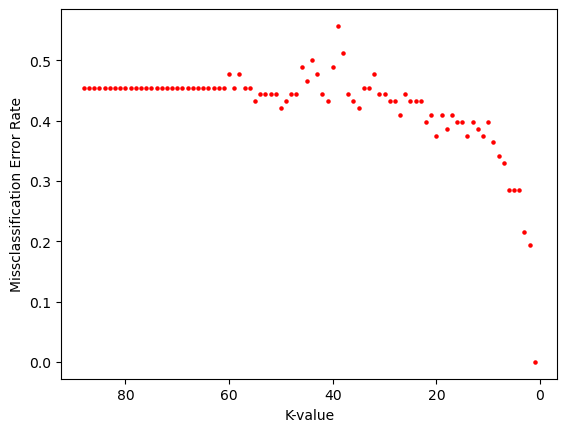

In [22]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

def calc_error(predicted, actual) -> float:
    count = 0
    for i in range(len(actual)):
        if predicted[i] != actual[i]:
            count+=1

    return count/len(actual)

    

df = pd.read_csv('/Users/BenChung/Desktop/CSCI360/lab-3-bjchung8/dataR2.csv', skiprows=lambda x: 41 <= x <=52 or 101 <= x)

training_predict = []
training_class = []
for i in range(88):
    training_predict.append([df['Age'][i], df['BMI'][i], df['Glucose'][i], df['Insulin'][i],
                     df['HOMA'][i], df['Leptin'][i], df['Adiponectin'][i], df['Resistin'][i],
                     df['MCP.1'][i]])
    training_class.append(df['Classification'][i])

k_errors = []
for i in range(88, 0, -1):
    classifier = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
    classifier.fit(training_predict, training_class)

    k_errors.append(calc_error(classifier.predict(training_predict), training_class))



plt.scatter([[i] for i in range (88,0,-1)], k_errors, c = 'red', s=5)
plt.gca().invert_xaxis()

plt.xlabel('K-value')
plt.ylabel('Missclassification Error Rate')
plt.show()



1(c) ii. Using the training output data to classify the test data, plotting the missclassification error rate and comparing to training data missclassification error rate. Also finding/printing most suitable k i.e. the k avlue with the smallest misclassifcation error rate

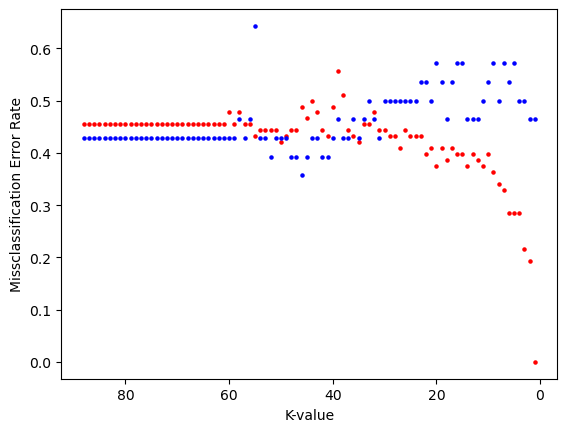

[46, 0.35714285714285715]


In [50]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

def calc_error(predicted, actual) -> float:
    count = 0
    for i in range(len(actual)):
        if predicted[i] != actual[i]:
            count+=1

    return count/len(actual)


# Training model
df = pd.read_csv('/Users/BenChung/Desktop/CSCI360/lab-3-bjchung8/dataR2.csv', skiprows=lambda x: 41 <= x <=52 or 101 <= x)

training_predictors = []
actual_training = []
for i in range(88):
    training_predictors.append([df['Age'][i], df['BMI'][i], df['Glucose'][i], df['Insulin'][i],
                     df['HOMA'][i], df['Leptin'][i], df['Adiponectin'][i], df['Resistin'][i],
                     df['MCP.1'][i]])
    actual_training.append(df['Classification'][i])

training_errors = []
for i in range(88, 0, -1):
    classifier = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
    classifier.fit(training_predictors, actual_training)

    training_errors.append(calc_error(classifier.predict(training_predictors), actual_training))



# Test predictions using training model
df2 = pd.read_csv('/Users/BenChung/Desktop/CSCI360/lab-3-bjchung8/dataR2.csv', skiprows=lambda x: 0 < x < 41 or 52 < x < 101)

test_predict = []
actual_test = []
for i in range(len(df2['Age'])):
    test_predict.append([df2['Age'][i], df2['BMI'][i], df2['Glucose'][i], df2['Insulin'][i],
                     df2['HOMA'][i], df2['Leptin'][i], df2['Adiponectin'][i], df2['Resistin'][i],
                     df2['MCP.1'][i]])
    actual_test.append(df2['Classification'][i])

best_k = 1
index = 0
test_errors = []
for i in range(88, 0, -1):
    classifier = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
    classifier.fit(training_predictors, actual_training)

    test_errors.append(calc_error(classifier.predict(test_predict), actual_test))
    if calc_error(classifier.predict(test_predict), actual_test) < best_k: 
        best_k = calc_error(classifier.predict(test_predict), actual_test)
        index = i


    

plt.scatter([[i] for i in range (88,0,-1)], k_errors, c = 'red', s=5)
plt.scatter([[i] for i in range (88,0,-1)], test_errors, c = 'blue', s=5)
plt.gca().invert_xaxis()

plt.xlabel('K-value')
plt.ylabel('Missclassification Error Rate')
plt.show()
print([index, best_k])

1(c) iii. k = 50

1(d). Code for 1d, using Minkowski with p values 1-5 for each k

In [53]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

def calc_error(predicted, actual) -> float:
    count = 0
    for i in range(len(actual)):
        if predicted[i] != actual[i]:
            count+=1

    return count/len(actual)


# Training model
df = pd.read_csv('/Users/BenChung/Desktop/CSCI360/lab-3-bjchung8/dataR2.csv', skiprows=lambda x: 41 <= x <=52 or 101 <= x)

training_predictors = []
actual_training = []
for i in range(88):
    training_predictors.append([df['Age'][i], df['BMI'][i], df['Glucose'][i], df['Insulin'][i],
                     df['HOMA'][i], df['Leptin'][i], df['Adiponectin'][i], df['Resistin'][i],
                     df['MCP.1'][i]])
    actual_training.append(df['Classification'][i])

training_errors = []
for i in range(88, 0, -1):
    classifier = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
    classifier.fit(training_predictors, actual_training)

    training_errors.append(calc_error(classifier.predict(training_predictors), actual_training))


# Test predictions using training model
df2 = pd.read_csv('/Users/BenChung/Desktop/CSCI360/lab-3-bjchung8/dataR2.csv', skiprows=lambda x: 0 < x < 41 or 52 < x < 101)

test_predict = []
actual_test = []
for i in range(len(df2['Age'])):
    test_predict.append([df2['Age'][i], df2['BMI'][i], df2['Glucose'][i], df2['Insulin'][i],
                     df2['HOMA'][i], df2['Leptin'][i], df2['Adiponectin'][i], df2['Resistin'][i],
                     df2['MCP.1'][i]])
    actual_test.append(df2['Classification'][i])

test_errors = []

# Calculating test error for KNN using Minkowski
lowest = 1
for i in range(88, 0, -1):
    for j in range(1,6):
        classifier = KNeighborsClassifier(n_neighbors=i, p=j, metric='minkowski')
        classifier.fit(training_predictors, actual_training)

        low = calc_error(classifier.predict(test_predict), actual_test)
        test_errors.append(calc_error(classifier.predict(test_predict), actual_test))
        if low < lowest: 
            lowest = low
            kval = i
            pval = j



print([kval, pval])
print(lowest)

[52, 1]
0.32142857142857145


1(d). Smallest misclassification error rate is when (k = 52, p = 1) = 0.3214% 